In [10]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib
from scipy.stats import norm, ttest_ind, iqr

In [2]:
'''
path segmented training images, either *_tumor.npy or *_clean.npy
'''
path_to_seg_images = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/seg_images"

'''
path to segmented image, e.g. 
'''
path_to_seg_hat = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/kmeans_classified"

#All tumor values
tumor_points = []

liklihood_clean = []
t_test_clean =[]

likelihood_tumor = []
t_test_tumor = []

likelihood_tumor_hat = []
t_test_tumor_hat = []


In [3]:
'''
Build set of all tumor pixels
'''

def gather_tumor_loop(path):  
    data_id = path.parts[len(path.parts)-1]


    if "tumor" in data_id:

        tumor = np.load(str(path))
        tumor_masked = tumor[tumor != 0 ]
        tumor_points.extend( list(tumor_masked.flatten()))

#list comprehension
[gather_tumor_loop(path) for path in pathlib.Path(path_to_seg_images).iterdir()]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [27]:
            
tumor_points_arr = (np.asarray(tumor_points)).flatten()
tumor_training_mean = np.mean(tumor_points_arr)
tumor_training_std = np.std(tumor_points_arr)

In [28]:
tumor_points_truncated=tumor_points_arr[tumor_points_arr < 3000]


In [40]:
tumor_points_highval = tumor_points_arr[tumor_points_arr > 3000]

In [29]:
tumor_training_mean

815.87366

In [30]:
tumor_training_std

2252.6353

In [31]:
np.unique(tumor_points_arr)

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.9278e+04, 2.9355e+04,
       2.9422e+04], dtype=float32)

In [32]:
np.median(tumor_points_arr)

448.0

In [33]:
iqr(tumor_points_arr)

360.0

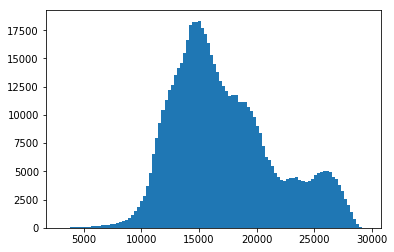

In [41]:
plt.figure()
plt.hist(tumor_points_highval, bins=100)

plt.show()

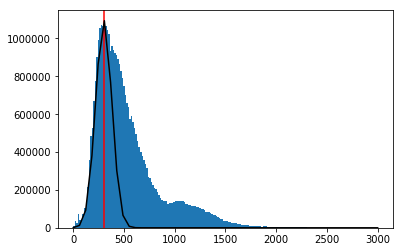

In [72]:
plt.figure()
plt.hist(tumor_points_truncated, bins=200)
plt.axvline(300, color="red")
x=np.linspace(0, 3000)
plt.plot(x, norm.pdf(x, 300, 80)*220000000, color="black")
plt.show()

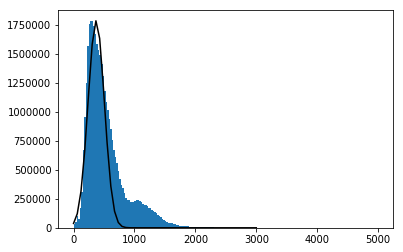

In [106]:
plt.figure()
plt.hist(tumor_points_arr[tumor_points_arr < 5000], bins=200)
x=np.linspace(0, 3000)
plt.plot(x, norm.pdf(x, 372, 134)*6e8, color="black")

plt.show()

In [74]:
from sklearn.mixture import GaussianMixture

In [76]:
gm = GaussianMixture(n_components=6, random_state=0).fit(tumor_points_arr.reshape(-1, 1))

In [82]:
np.sqrt(gm.covariances_)

array([[[ 370.97878457]],

       [[1461.46392446]],

       [[ 134.11621396]],

       [[1806.3940691 ]],

       [[1848.51970975]],

       [[1613.04454656]]])

In [83]:
gm.means_

array([[  827.07168197],
       [15466.05614596],
       [  372.35408266],
       [25062.42285279],
       [12686.29315222],
       [19321.08926096]])

In [ ]:
ttest_ind(target_masked, norm.rv(100, 372, 134), equal_var = False)

In [59]:
#Compare training class tumors with other types of tissues

def comparison_tumor_loop(path, data_tag, likelihood_list, t_test_list):  
    data_id = path.parts[len(path.parts)-1]


    if data_tag in data_id:

        target = np.load(str(path)).flatten()
        target_masked = target[target!=0]
        #calculate liklihood - Is this mean in line with the global mean assuming normality?
        likelihood_list.append(norm.pdf(np.mean(target_masked), tumor_training_mean, tumor_training_std))
        
        #perform t-test 
        
        #need to check variance difference for Welch or Student T test
        if abs(np.std(target_masked) -tumor_training_std) >10:
            res = ttest_ind(target_masked, tumor_points_arr)
        else:
            res=ttest_ind(target_masked, tumor_points_arr, equal_var = False)

        t_test_list.append(res[1]) # p-value

In [60]:
liklihood_clean = []
t_test_clean =[]


In [61]:
'''
Iterate thorugh all nontumor material to get metrics (should be low p value)
'''        
#list comprehension
[comparison_tumor_loop(path, "clean", liklihood_clean, t_test_clean) 
     for path in pathlib.Path(path_to_seg_images).iterdir()]



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [62]:
clean_is_tumor = {"likelihood":liklihood_clean, "T test": t_test_clean}
            

In [64]:
np.mean(np.asarray(liklihood_clean))

0.00016957249063085717

In [65]:
np.mean(np.asarray(t_test_clean))

0.0025500373397969525

In [67]:
'''
Iterate thorugh all labeled tumor material to get metrics (should be very high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "tumor", likelihood_tumor, t_test_tumor)
     for path in pathlib.Path(path_to_seg_images).iterdir()]
            
tumor_is_tumor = {"likelihood":likelihood_tumor, "T test": t_test_tumor}

In [68]:
np.mean(np.asarray(likelihood_tumor))

0.00017161498305650453

In [69]:
np.mean(np.asarray(t_test_tumor))

0.0034662090351609835

In [71]:
'''
Iterate through all segmented material to get metrics (shoudl be high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "", likelihood_tumor_hat, t_test_tumor_hat)
     for path in pathlib.Path(path_to_seg_hat).iterdir()]
   
hat_is_tumor = {"likelihood":likelihood_tumor_hat, "T test": t_test_tumor_hat}    

FileNotFoundError: [Errno 2] No such file or directory: 'N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/kmeans_classified'

In [ ]:
            
np.savez(path_to_results+"/clean_is_tumor.npz", **clean_is_tumor)
np.savez(path_to_results+"/tumor_is_tumor.npz", **tumor_is_tumor)
np.savez(path_to_results+"/hat_is_tumor.npz", **hat_is_tumor)

# slurm script for t test

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib



'''
path segmented training images, either *_tumor.npy or *_clean.npy
'''
path_to_seg_images = "/N/laidel...."

'''
path to segmented image, e.g. 
'''
path_to_seg_hat = "../results/kmeans-classified"

#All tumor values
tumor_points = []

liklihood_clean = []
t_test_clean =[]

likelihood_tumor = []
t_test_tumor = []

likelihood_tumor_hat = []
t_test_tumor_hat = []

'''
Build set of all tumor pixels
'''

def gather_tumor_loop(path):  
    data_id = path.parts[len(path.parts)-1]


    if "tumor" in data_id:

        tumor = np.load(str(path))
        tumor_points.append(tumor.flatten())

#list comprehension
[gather_tumor_loop(path) for path in pathlib.Path(path_to_seg_images).iterdir()]
            
tumor_points_arr = np.asarray(tumor_points).flatten()
tumor_training_mean = np.mean(tumor_points_arr)
tumor_training_std = np.std(tumor_points_arr)
'''
Iterate thorugh all nontumor material to get metrics (should be low p value)
'''
def comparison_tumor_loop(path, data_tag, likelihood_list, t_test_list):  
    data_id = path.parts[len(path.parts)-1]


    if data_tag in data_id:

        target = np.load(str(path)).flatten()
        
        #calculate liklihood - Is this mean in line with the global mean assuming normality?
        likelihood_list.append(norm.pdf(np.mean(target), tumor_training_mean, tumor_training_std))
        
        #perform t-test 
        
        #need to check variance difference for Welch or Student T test
        if abs(np.std(target) -tumor_train_std) >10:
            res = ttest_ind(target, tumor_points_arr)
        else:
            res=ttest_ind(target, tumor_points_arr, equal_var = False)

        t_test_list.append(res[1]) # p-value

        

#list comprehension
[comparison_tumor_loop(path, "clean", liklihood_clean, t_test_clean) 
     for path in pathlib.Path(path_to_seg_images).iterdir()]

clean_is_tumor = {"likelihood":likelihood_clean, "T test", t_test_clean}
            
'''
Iterate thorugh all labeled tumor material to get metrics (should be very high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "tumor", likelihood_tumor, t_test_tumor)
     for path in pathlib.Path(path_to_seg_images).iterdir()]
            
tumor_is_tumor = {"likelihood":likelihood_tumor, "T test", t_test_tumor}
'''
Iterate through all segmented material to get metrics (shoudl be high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "", likelihood_tumor_hat, t_test_tumor_hat)
     for path in pathlib.Path(path_to_seg_hat).iterdir()]
   
hat_is_tumor = {"likelihood":likelihood_tumor_hat, "T test", t_test_tumor_hat}            
            
np.savez(path_to_results+"/clean_is_tumor.npz", **clean_is_tumor)
np.savez(path_to_results+"/tumor_is_tumor.npz", **tumor_is_tumor)
np.savez(path_to_results+"/hat_is_tumor.npz", **hat_is_tumor)

KeyError: 'True is not a file in the archive'

In [ ]:
res = np.load("../results/tumor_metrics.npz", allow_pickle=True)
dict(res)

In [31]:
res = np.load("../results/nontumor_metrics.npz", allow_pickle=True)
dict(res)

{'BraTS20_Training_232_clean.npy': array([214.59926631,  59.10282921]),
 'BraTS20_Training_230_clean.npy': array([233.55514487,  61.39411202])}